In [1]:
import numpy as np
import math

from scipy.linalg import solve_triangular as scipy_solve_triangular
from scipy.linalg import qr as sp_qr
from scipy.linalg import solve_triangular as sp_solve_triangular
from scipy.sparse.linalg import SuperLU as sp_SuperLU
from scipy.sparse.linalg import cg as sp_cg
import scipy.sparse as sps

from scipy.stats import linregress

import jlinops


from jlinops import MatrixLinearOperator, _CustomLinearOperator 
from jlinops import banded_cholesky
from jlinops import DiagonalOperator
from jlinops import Neumann2D
from jlinops import dct_sqrt_pinv, dct_pinv
from jlinops import cg
from jlinops import issparse, tosparse, get_device
from jlinops import QRPinvOperator


from jlinops import CUPY_INSTALLED
if CUPY_INSTALLED:
    import cupy as cp
    from cupyx.scipy.linalg import solve_triangular as cp_solve_triangular
    from cupy.linalg import qr as cp_qr
    from cupyx.scipy.sparse.linalg import SuperLU as cp_SuperLU



import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['text.usetex'] = True
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rc('text.latex', preamble=r'\usepackage{amsmath}')



In [2]:
N = 200

In [4]:
w = np.random.uniform(low=1, high=50, size=2*N*N)
Apinv = jlinops.CGWeightedNeumann2DPinvOperator((N,N), 1.0/np.sqrt(w) , tol=1e-4)
R = jlinops.Dirichlet2D((N,N))
WR = DiagonalOperator(1.0/np.sqrt(w)) @ R 

In [5]:
it_counts = []
for j in range(50):
    
    # Initialize a counter for the iterations
    iteration_count = 0

    # Define the callback function
    def callback(xk):
        global iteration_count
        iteration_count += 1

    v = np.random.normal(size=2*N*N)
    _ = sp_cg(Apinv.Rwpinv.C, Apinv.Rwpinv.A.T @ v, callback=callback, M=Apinv.Rwpinv.Mpinv)

    it_counts.append(iteration_count)
    #print(iteration_count)

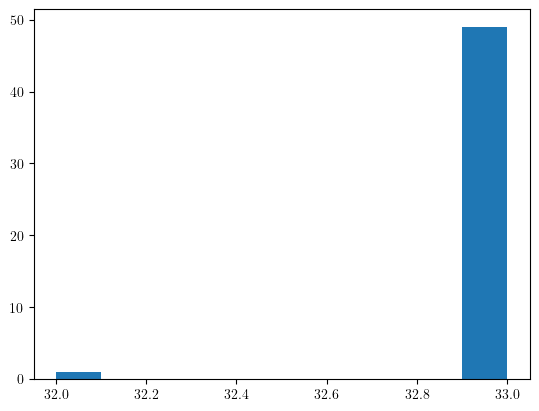

In [6]:
plt.hist(it_counts)
plt.show()

In [7]:
np.mean(it_counts)

32.98